<h1>Parkinsons Dataset</h1>
<hr align="center">
<img src="20160906-parkinsonian.jpg"  width="400" height="400">

About the disease : A disorder of the central nervous system that affects movement, often including tremors.Nerve cell damage in the brain causes dopamine levels to drop, leading to the symptoms of Parkinson's.
Parkinson's often starts with a tremor in one hand. Other symptoms are slow movement, stiffness and loss of balance.

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

In [2]:
import numpy as np
import pandas as pd 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score


In [3]:
df=pd.read_csv("parkinsons.data")

<h2>Matrix column entries (attributes):</h2>
<hr align="center">
<li>name - ASCII subject name and recording number</li>
<li><B>MDVP:Fo(Hz) - Average vocal fundamental frequency</B></li>
<li>MDVP:Fhi(Hz) - Maximum vocal fundamental frequency</li>
<li><B>MDVP:Flo(Hz) - Minimum vocal fundamental frequency</B></li>
<li>MDVP:Jitter(%)</li>
<li>MDVP:Jitter(Abs)</li>
<li>MDVP:RAP</li>
<li>MDVP:PPQ</li>
<li>Jitter:DDP - Several measures of variation in fundamental frequency</li>
<li><B>MDVP:ShimmerMDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude</B></li>
<li><B>NHR, HNR - Two measures of the ratio of noise to tonal components in the voice</B></li>
<li>status - The health status of the subject (one) - Parkinson's, (zero) - healthy</li>
<li>RPDE, D2 - Two nonlinear dynamical complexity measures</li>
<li>DFA - Signal fractal scaling exponent</li>
<li><B>spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation</B></li>

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [5]:
df.shape

(195, 24)

In [6]:
df.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [7]:
df.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [8]:
df['status'].value_counts()

status
1    147
0     48
Name: count, dtype: int64

In [9]:
df.drop(columns=["name"], axis=1, inplace=True)

In [10]:
df.head()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


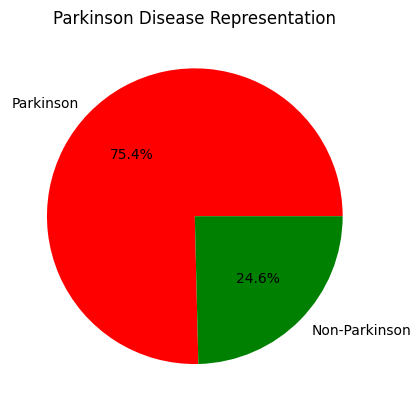

In [11]:
import matplotlib.pyplot as plt
parkinsons = df[df['status'] == 1].shape[0]
non_parkinsons = df[df['status'] == 0].shape[0]
labels = ['Parkinson', 'Non-Parkinson']
sizes = [parkinsons, non_parkinsons]
colors = ['red', 'green']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Parkinson Disease Representation')
plt.show()

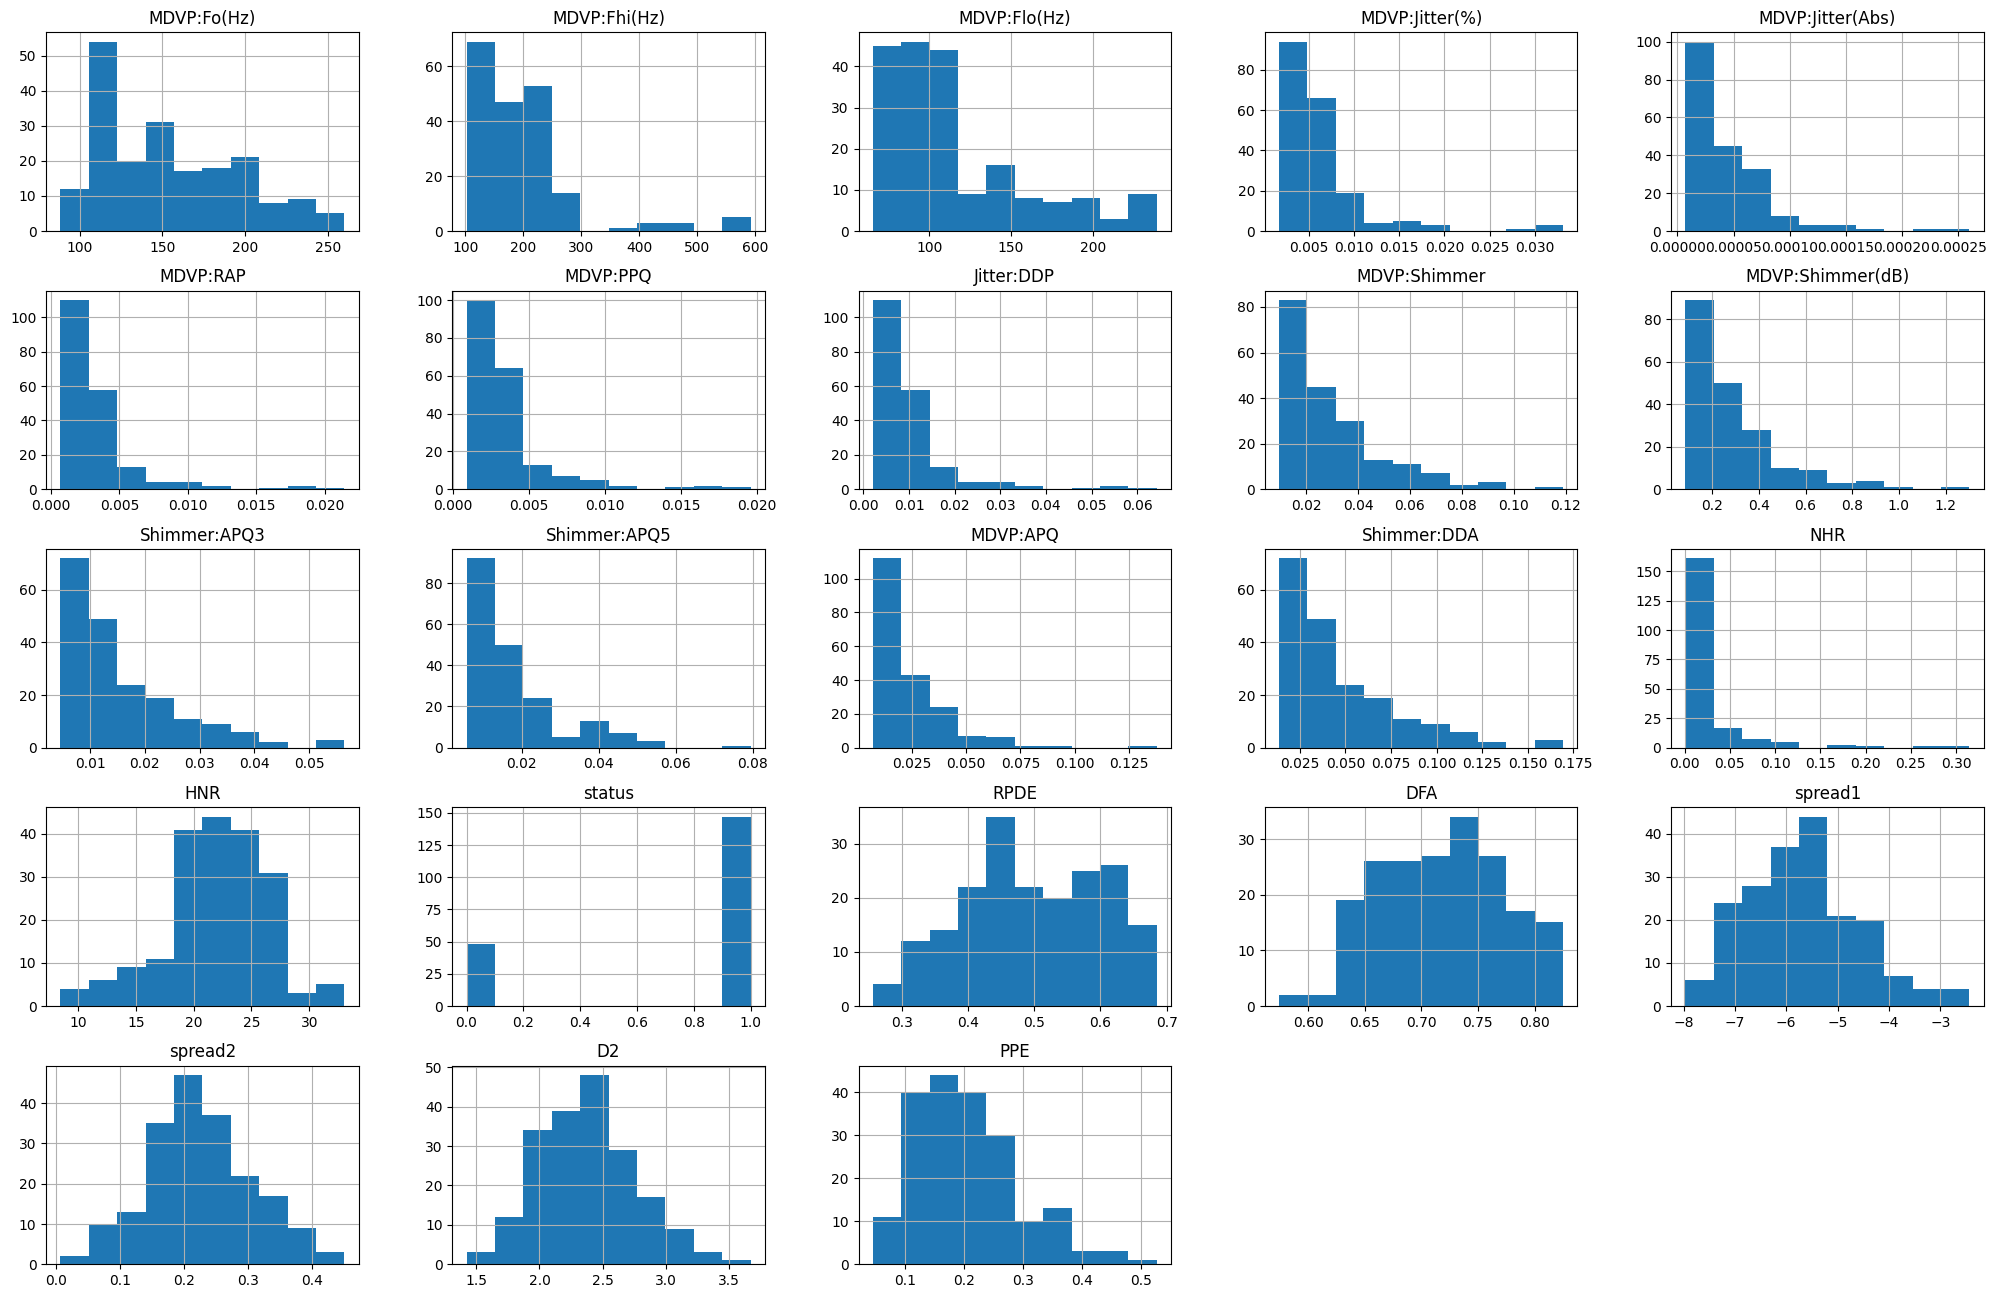

In [12]:
import matplotlib.pyplot as plt
df.hist(figsize=(25,16))
plt.show()


<h3>Each histogram shows the frequency of a particular feature value. Here are some specific observations about the data that can be gleaned from the histograms:</h3>
<hr align="center">
<li>MDVP:Fo(Hz): This histogram represents the distribution of fundamental frequencies. It shows a bimodal distribution, with one peak around 160 Hz and another around 200 Hz. This suggests that there may be two subgroups of patients with different vocal fold vibration frequencies.</li>

<li>MDVP:Fhi(Hz): This histogram represents the distribution of high frequency components of the voice. The distribution is similar to the fundamental frequency (MDVP:Fo(Hz)), with two peaks around 160 Hz and 200 Hz.</li>

<li>MDVP:Flo(Hz): This histogram represents the distribution of low frequency components of the voice. The distribution is centered around 100 Hz, with a tail extending towards lower frequencies.</li>

<li>MDVP:Jitter(%): Jitter measures the variation in the timing between vocal fold vibrations. The histogram shows that jitter is mostly concentrated between 0.005 and 0.015, with a peak around 0.010.</li>

<li>MDVP:Jitter(Abs): This histogram likely represents the absolute values of jitter, though the absolute scale is not provided. The distribution is similar to the jitter percentage, concentrated between 0 and 0.030 with a peak around 0.010.</li>

<li>MDVP:Shimmer: Shimmer measures the variation in the amplitude of vocal fold vibrations. The distribution is difficult to discern due to the scaling on the y-axis, but it appears to be centered around 0.0 with a long tail extending towards higher values.</li>

<li>MDVP:Shimmer(dB): This histogram likely represents the distribution of shimmer in decibels. The scaling on the y-axis makes it difficult to interpret the distribution, but it appears to be similar to the shimmer histogram.</li>

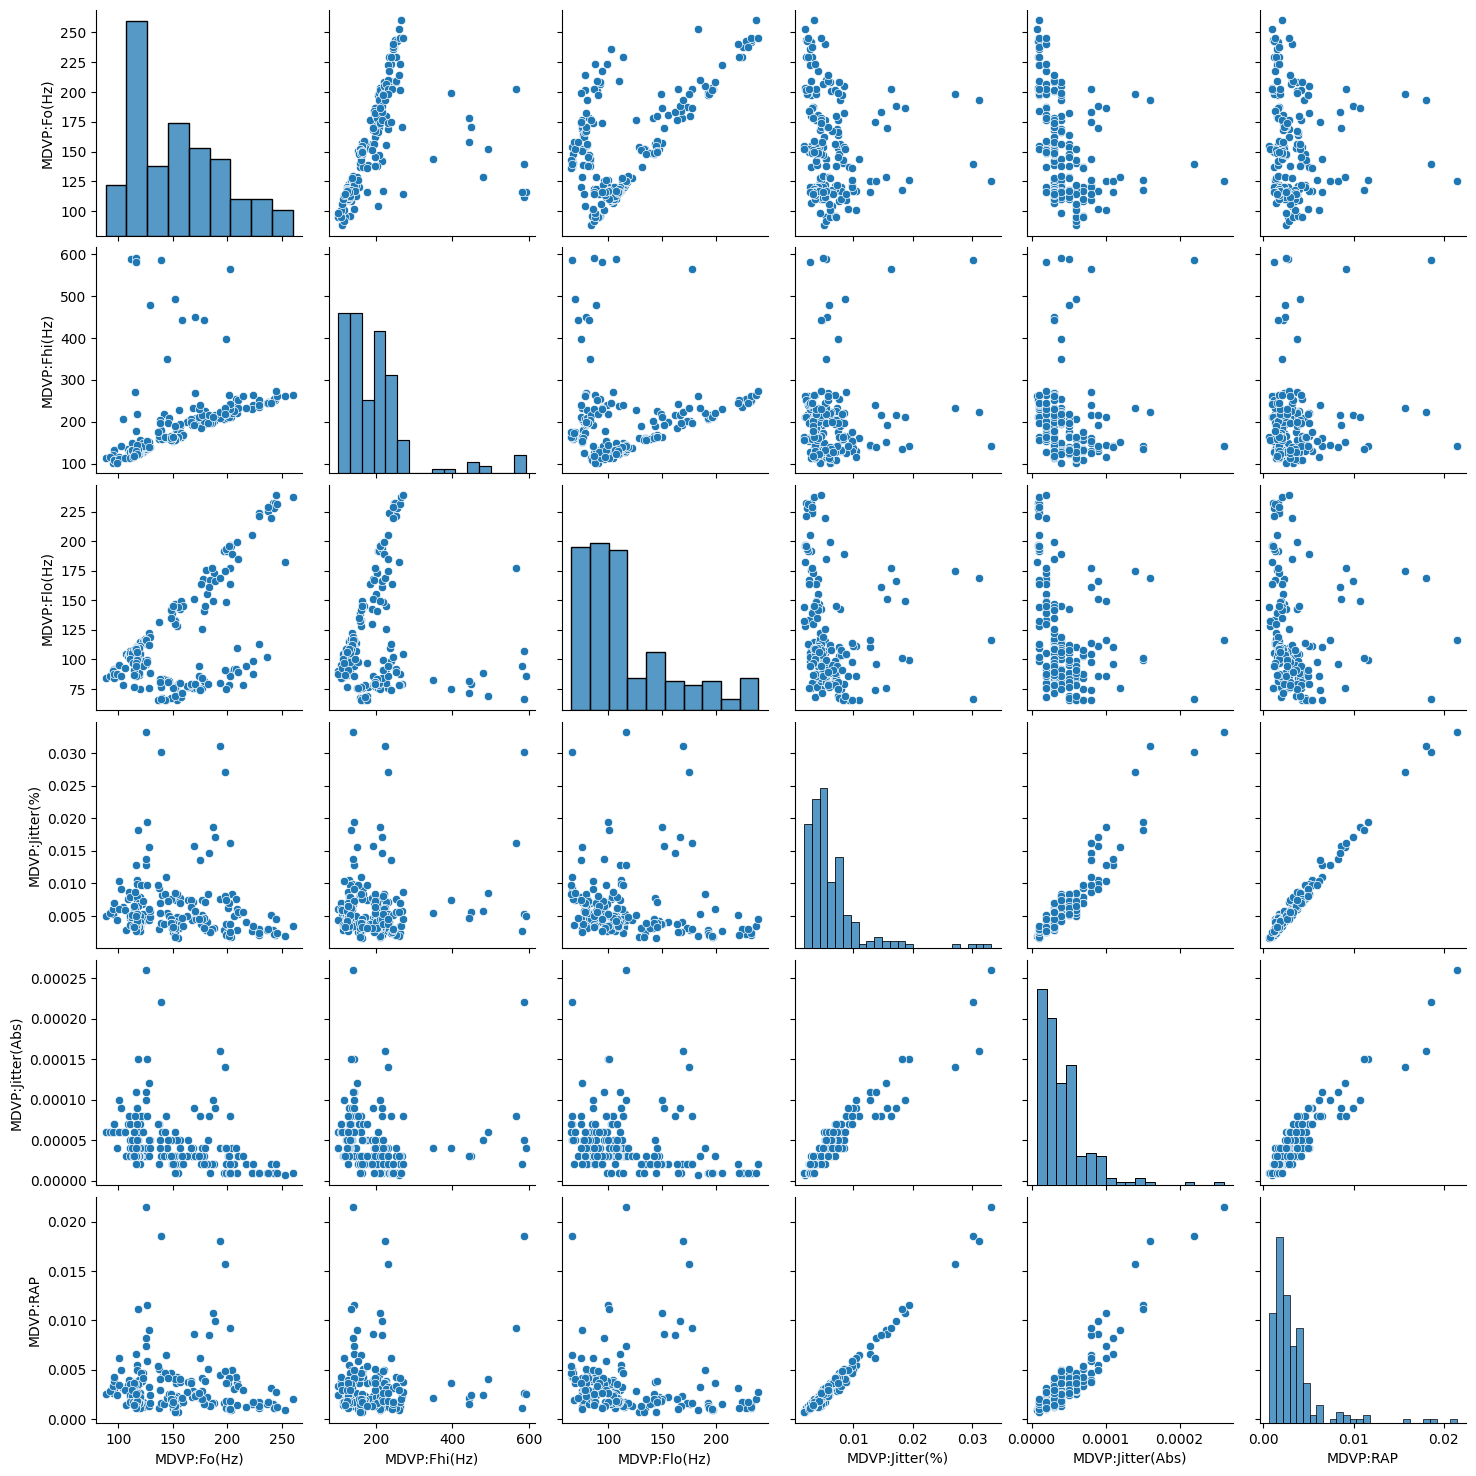

In [13]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.pairplot(df.iloc[:,0:6])
plt.show()

<h3>Interpretation of the pair plot</h3>
<hr align="center">
<li>MDVP:Fo(Hz) vs MDVP:Fhi(Hz): There is a positive correlation between these two features. This means that as the fundamental frequency (MDVP:Fo(Hz)) increases, the high frequency components (MDVP:Fhi(Hz)) also tend to increase. This makes sense, as both features are related to the pitch of the voice.</li>

<li>MDVP:Fo(Hz) vs MDVP:Jitter(%): There appears to be a weak negative correlation between these two features. This means that as the fundamental frequency (MDVP:Fo(Hz)) increases, the jitter (MDVP:Jitter(%)) tends to decrease slightly. Jitter is a measure of the variation in timing between vocal fold vibrations, so a lower jitter may indicate a more stable voice.</li>

<li>MDVP:Jitter(%) vs MDVP:Shimmer: It is difficult to see a clear correlation between jitter and shimmer from this plot. Shimmer measures the variation in the amplitude of vocal fold vibrations.</li>

<li>MDVP:RAP vs MDVP:Jitter(%):  MDVP:RAP appears to be negatively correlated with jitter. MDVP:RAP is the ratio of the average normalized amplitude of the aperiodicity to the average normalized amplitude of the periodicity.</li>

In [14]:
df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


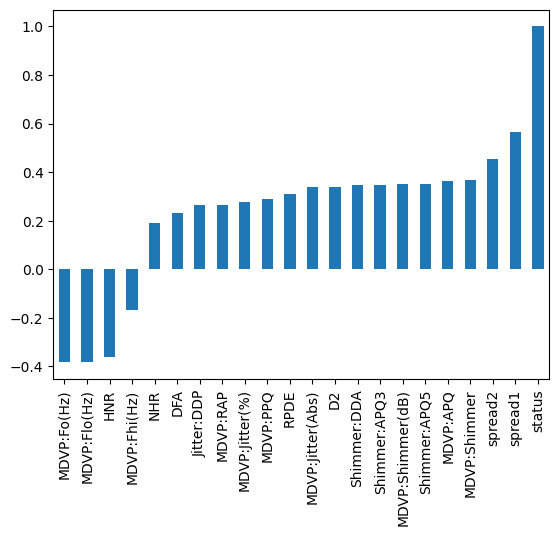

In [15]:
df.corr()['status'][:-1].sort_values().plot(kind='bar')
plt.show()

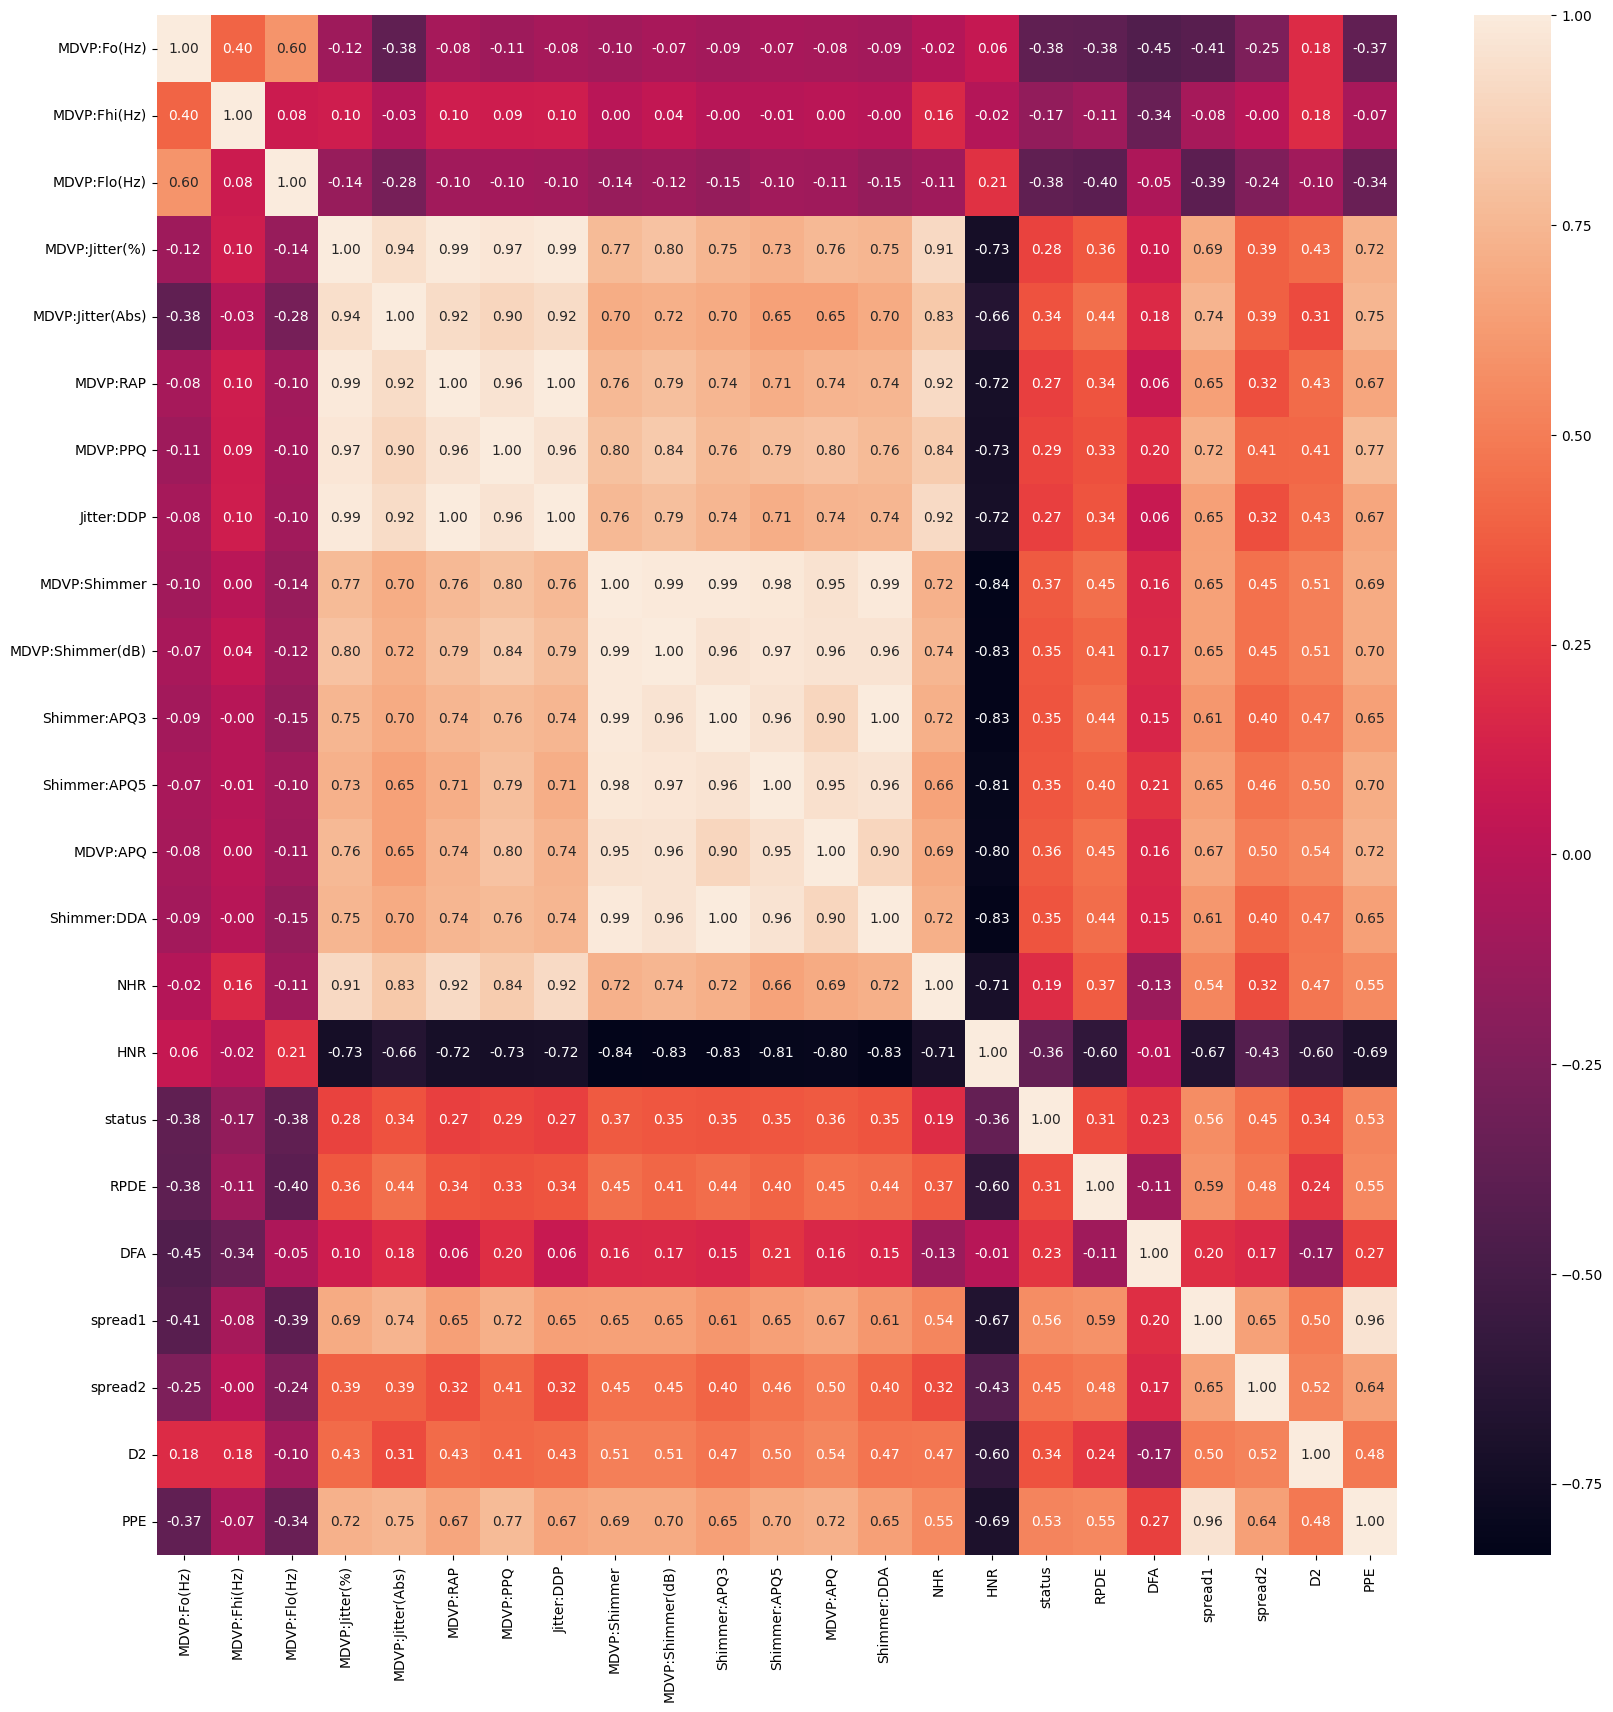

In [16]:
f,ax=plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt='0.2f')
plt.show()
# The heatmap shows the correlation coefficients between each pair of columns in the data set.
# The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.
# The mask parameter is used to hide the upper triangle of the heatmap, since it is redundant.
# The annot parameter is used to display the correlation coefficients on the heatmap.
# The cmap parameter is used to specify the color scheme for the heatmap.
# The fmt parameter is used to specify the format of the correlation coefficients.
# The figuresize parameter is used to specify the size of the heatmap.


<h3>In the Parkinson's disease dataset, some of the voice measurements that are highly correlated with each other include:</h3>
<hr align="center">
<li>Jitter: Jitter measures the variation in the timing between vocal fold vibrations.</li>
<li>Shimmer: Shimmer measures the variation in the amplitude of vocal fold vibrations.</li>
<li>NHR: NHR (normalized harmonic ratio) is a measure of the harmonic content of the voice.</li>
<li>HNR: HNR (harmonics-to-noise ratio) is another measure of the harmonic content of the voice.</li>
<li>These findings suggest that these voice measurements may be useful for diagnosing Parkinson's disease.</li>

<hr align="center">
<h2>The EDA conclusion</h2>
<hr align="center">

<h4>Potential biomarkers for Parkinson's disease:</h4>

Voice characteristics: Analysis of features like jitter, shimmer, fundamental frequency (Fo), and harmonics-to-noise ratio (HNR) might reveal differences between people with Parkinson's and healthy controls.
Increased jitter and shimmer may indicate greater variation in vocal fold vibrations, potentially مرتبط (mortabet) with Parkinson's.
Lower Fo and HNR might be linked to changes in vocal pitch and quality.

<h4>Data distribution:</h4>

The distribution of some features may provide insights. For instance, the bimodal distribution of Fo suggests two subgroups of patients with distinct vocal characteristics.

<h4>Relationships between features:</h4>

Techniques like correlation heatmaps and pair plots can reveal relationships between features.
Positive correlations between Fo and Fhi (high-frequency components) make sense as they're both related to pitch.
A weak negative correlation between Fo and jitter might indicate that a steadier voice (lower jitter) is associated with higher fundamental frequency.

<h4>Important considerations:</h4>

Correlation doesn't equal causation. Just because features move together doesn't mean one causes the other.
These are initial findings. Further analysis is needed to confirm these observations and draw stronger conclusions.

Overall, EDA suggests that voice characteristics hold promise as biomarkers for Parkinson's disease. However, more investigation is necessary to validate these findings and understand the underlying mechanisms.

In [17]:
X = df.drop('status', axis=1)
y = df['status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.feature_selection import SelectKBest
selector = SelectKBest(k=8)
X_train_selected = selector.fit_transform(X_train, y_train)
X_test_selected = selector.transform(X_test)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
clf = svm.SVC(kernel='linear')
clf.fit(X_train_selected, y_train)
y_pred = clf.predict(X_test_selected)
accuracy = accuracy_score(y_test, y_pred)
print("Train Accuracy:", clf.score(X_train_selected, y_train))
print("Test Accuracy:", accuracy)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", selected_features)


Train Accuracy: 0.8525641025641025
Test Accuracy: 0.9230769230769231
Selected Features: Index(['MDVP:Fo(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Shimmer', 'MDVP:APQ', 'HNR',
       'spread1', 'spread2', 'PPE'],
      dtype='object')


In [18]:
# To check the prediction
import numpy as np
input_data = (119.92, 74.997, 0.426, 0.02971, 21.033, -4.81203, 0.266482, 0.284657)
input_data_as=np.asarray(input_data)
input_data_reshaped=input_data_as.reshape(1,-1)
prediction=clf.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have Parkinsons Disease.')
else:
    print('The person has the Parkinsons disease.')

[1]
The person has the Parkinsons disease.


In [19]:
import pickle

In [20]:
filename='trained_model2.sav'
pickle.dump(clf,open(filename,'wb'))
loaded_model2=pickle.load(open('trained_model2.sav','rb'))

In [21]:
# to check the prediction of the loaded model
import numpy as np
input_data = (119.92, 74.997, 0.426, 0.02971, 21.033, -4.81203, 0.266482, 0.284657)
input_data_as=np.asarray(input_data)
input_data_reshaped=input_data_as.reshape(1,-1)
prediction=loaded_model2.predict(input_data_reshaped)
print(prediction)
if(prediction[0]==0):
    print('The person does not have Parkinsons Disease.')
else:
    print('The person has the Parkinsons disease.')

[1]
The person has the Parkinsons disease.
